<a href="https://colab.research.google.com/github/SandroEsteban/challenge-alura-store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

suma_tienda1 = tienda1['Precio'].sum()
suma_tienda2 = tienda2['Precio'].sum()
suma_tienda3 = tienda3['Precio'].sum()
suma_tienda4 = tienda4['Precio'].sum()


print(f"Ingreso total de la tienda 1: {suma_tienda1:,.0f}")
print(f"Ingreso total de la tienda 2: {suma_tienda2:,.0f}")
print(f"Ingreso total de la tienda 3: {suma_tienda3:,.0f}")
print(f"Ingreso total de la tienda 4: {suma_tienda4:,.0f}")

Ingreso total de la tienda 1: 1,150,880,400
Ingreso total de la tienda 2: 1,116,343,500
Ingreso total de la tienda 3: 1,098,019,600
Ingreso total de la tienda 4: 1,038,375,700


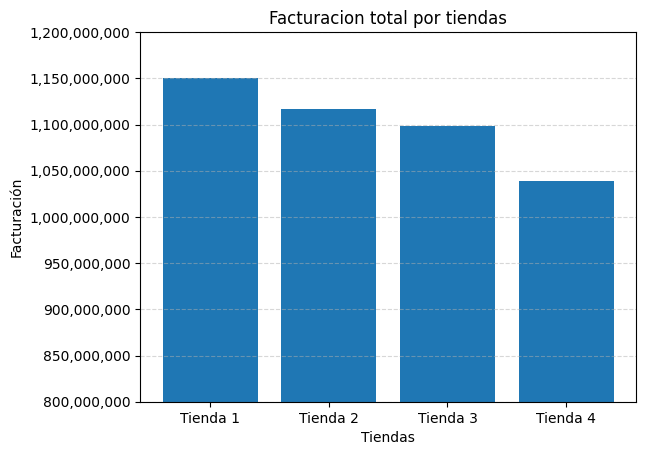

In [3]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos_tiendas = [suma_tienda1, suma_tienda2, suma_tienda3, suma_tienda4]

plt.bar(tiendas, ingresos_tiendas)
plt.title('Facturacion total por tiendas')
plt.xlabel('Tiendas')
plt.ylabel('Facturación')
plt.ylim(800000000, 1200000000)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

# 2. Ventas por categoría

In [4]:
categoria_tienda1 = tienda1['Categoría del Producto'].unique()
print(categoria_tienda1)

['Electrónicos' 'Muebles' 'Juguetes' 'Electrodomésticos'
 'Artículos para el hogar' 'Deportes y diversión' 'Libros'
 'Instrumentos musicales']


In [5]:
suma_por_categoria_tienda1 = tienda1.groupby('Categoría del Producto')['Precio'].sum()
suma_por_categoria_tienda2 = tienda2.groupby('Categoría del Producto')['Precio'].sum()
suma_por_categoria_tienda3 = tienda3.groupby('Categoría del Producto')['Precio'].sum()
suma_por_categoria_tienda4 = tienda4.groupby('Categoría del Producto')['Precio'].sum()

print(f'Tienda 1: \n\n {suma_por_categoria_tienda1}\n')
print(f'Tienda 2: \n\n {suma_por_categoria_tienda2}\n')
print(f'Tienda 3: \n\n {suma_por_categoria_tienda3}\n')
print(f'Tienda 4: \n\n {suma_por_categoria_tienda4}\n')

Tienda 1: 

 Categoría del Producto
Artículos para el hogar     12698400.0
Deportes y diversión        39290000.0
Electrodomésticos          363685200.0
Electrónicos               429493500.0
Instrumentos musicales      91299000.0
Juguetes                    17995700.0
Libros                       8784900.0
Muebles                    187633700.0
Name: Precio, dtype: float64

Tienda 2: 

 Categoría del Producto
Artículos para el hogar     14746900.0
Deportes y diversión        34744500.0
Electrodomésticos          348567800.0
Electrónicos               410831100.0
Instrumentos musicales     104990300.0
Juguetes                    15945400.0
Libros                      10091200.0
Muebles                    176426300.0
Name: Precio, dtype: float64

Tienda 3: 

 Categoría del Producto
Artículos para el hogar     15060000.0
Deportes y diversión        35593100.0
Electrodomésticos          329237900.0
Electrónicos               410775800.0
Instrumentos musicales      77380900.0
Juguetes     

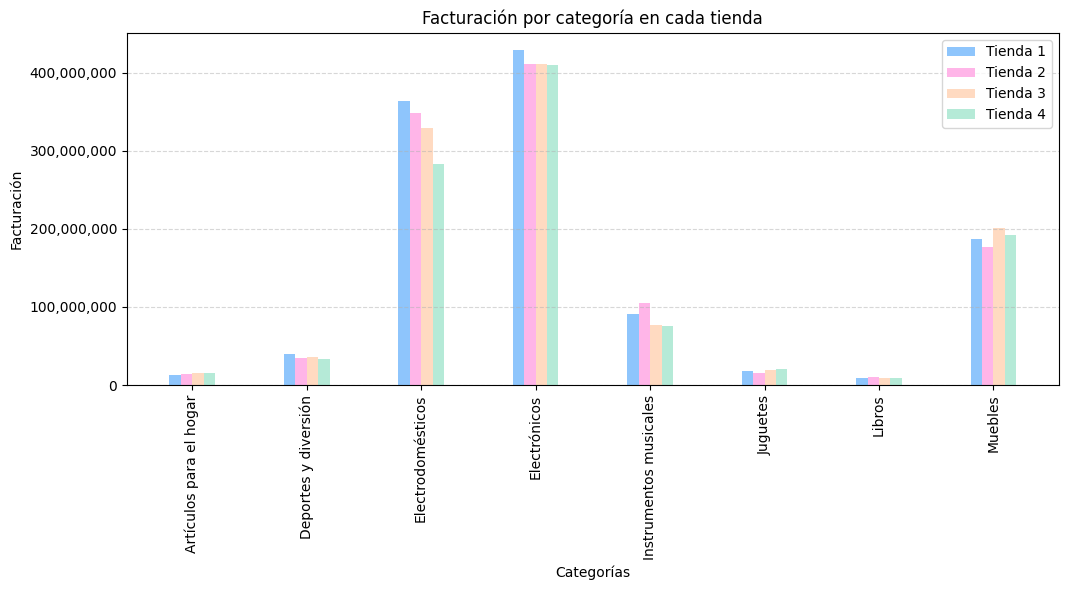

In [6]:
import numpy as np

def separacion(sumas_por_categorias):
  categoria = []
  precio = []

  for cat,val in sumas_por_categorias.items():
    categoria.append(cat)
    precio.append(val)

  return categoria, precio

categorias1, precios1 = separacion(suma_por_categoria_tienda1)
categorias2, precios2 = separacion(suma_por_categoria_tienda2)
categorias3, precios3 = separacion(suma_por_categoria_tienda3)
categorias4, precios4 = separacion(suma_por_categoria_tienda4)

categorias_grafico_total = categorias1

tienda_1 = precios1
tienda_2 = precios2
tienda_3 = precios3
tienda_4 = precios4


x = np.arange(len(categorias_grafico_total))  # posiciones base en el eje X
ancho = 0.1  # ancho de cada barra

colores = ['#8EC5FC', '#FFB5E8', '#FFDAC1', '#B5EAD7']

# Crear gráfico
plt.figure(figsize=(10, 6))

# Dibujar cada barra con desplazamiento
plt.bar(x - 1.5 * ancho, tienda_1, width=ancho, label='Tienda 1', color=colores[0])
plt.bar(x - 0.5 * ancho, tienda_2, width=ancho, label='Tienda 2', color=colores[1])
plt.bar(x + 0.5 * ancho, tienda_3, width=ancho, label='Tienda 3', color=colores[2])
plt.bar(x + 1.5 * ancho, tienda_4, width=ancho, label='Tienda 4', color=colores[3])

# Etiquetas
plt.xlabel('Categorías')
plt.ylabel('Facturación')
plt.title('Facturación por categoría en cada tienda')
plt.xticks(x, categorias_grafico_total, rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()


Gastado en total por cada categoria: 

Artículos para el hogar: 57,579,800
Deportes y diversión: 142,977,700
Electrodomésticos: 1,324,751,100
Electrónicos: 1,660,576,500
Instrumentos musicales: 348,772,600
Juguetes: 73,604,400
Libros: 37,696,100
Muebles: 757,661,000


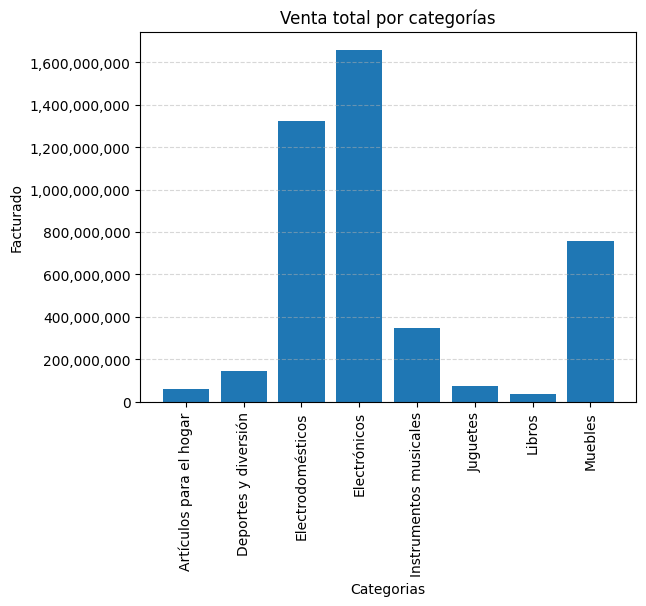

In [7]:
nuevos_precios_total = [precios1, precios2, precios3, precios4]
resultado = list(map(sum,zip(*nuevos_precios_total)))
tupla_creada = list(zip(categorias1, resultado))

print("Gastado en total por cada categoria: \n")
for categoria, total in tupla_creada:
  print(f"{categoria}: {total:,.0f}")


plt.bar(categorias1, resultado)
plt.title("Venta total por categorías")
plt.xlabel("Categorias")
plt.ylabel("Facturado")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=90)
plt.show()

# 3. Calificación promedio de la tienda


In [8]:
promedio_tienda1 = round(tienda1['Calificación'].mean(),2)
promedio_tienda2 = round(tienda2['Calificación'].mean(),2)
promedio_tienda3 = round(tienda3['Calificación'].mean(),2)
promedio_tienda4 = round(tienda4['Calificación'].mean(),2)

print(f"El promedio de calificacion de la tienda 1 es de {promedio_tienda1}")
print(f"El promedio de calificación de la tienda 2 es de {promedio_tienda2}")
print(f"El promedio de calificación de la tienda 3 es de {promedio_tienda3}")
print(f"El promedio de calificación de la tienda 4 es de {promedio_tienda4}")


El promedio de calificacion de la tienda 1 es de 3.98
El promedio de calificación de la tienda 2 es de 4.04
El promedio de calificación de la tienda 3 es de 4.05
El promedio de calificación de la tienda 4 es de 4.0


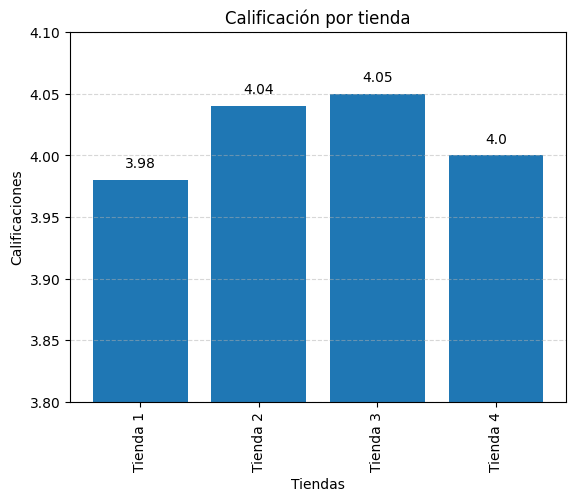

In [9]:
calificaciones_tiendas = [promedio_tienda1, promedio_tienda2, promedio_tienda3, promedio_tienda4]

plt.bar(tiendas, calificaciones_tiendas)
plt.title("Calificación por tienda")
plt.xlabel("Tiendas")
plt.ylabel("Calificaciones")
plt.ylim(3.8, 4.1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=90)

for i, valor in enumerate(calificaciones_tiendas):
    plt.text(i, valor + 0.01, str(valor), ha='center')


plt.show()

# 4. Productos más y menos vendidos

In [10]:
productos_tienda1 = tienda1['Producto'].unique()
print(productos_tienda1)

['Asistente virtual' 'Mesa de comedor' 'Juego de mesa' 'Microondas'
 'Silla de oficina' 'Bloques de construcción' 'Muñeca bebé' 'Lavavajillas'
 'Lavadora de ropa' 'Carrito de control remoto' 'Refrigerador'
 'Auriculares' 'Olla de presión' 'Bicicleta' 'Ciencia de datos con Python'
 'Balón de voleibol' 'Ajedrez de madera' 'TV LED UHD 4K' 'Vaso térmico'
 'Kit de bancas' 'Dashboards con Power BI' 'Cubertería' 'Set de ollas'
 'Batería' 'Cuerda para saltar' 'Estufa' 'Cama box' 'Impresora'
 'Mesa de noche' 'Armario' 'Dinosaurio Rex' 'Guitarra eléctrica'
 'Secadora de ropa' 'Sofá reclinable' 'Tablet ABXY' 'Cubo mágico 8x8'
 'Set de vasos' 'Modelado predictivo' 'Iphone 15' 'Mochila'
 'Balón de baloncesto' 'Auriculares con micrófono' 'Sillón'
 'Guitarra acústica' 'Iniciando en programación' 'Celular ABXY'
 'Smartwatch' 'Mesa de centro' 'Cama king' 'Smart TV' 'Pandereta']


In [31]:
conteo_productos1 = tienda1['Producto'].value_counts().head(5)
print("Tienda 1 - Top 5")
print(conteo_productos1)

conteo_productos2 = tienda2['Producto'].value_counts().head(5)
print("\nTienda 2 - Top 5")
print(conteo_productos2)

conteo_productos3 = tienda3['Producto'].value_counts().head(5)
print("\nTienda 3 - Top 5")
print(conteo_productos3)

conteo_productos4 = tienda4['Producto'].value_counts().head(5)
print("\nTienda 4 - Top 5")
print(conteo_productos4)

Tienda 1 - Top 5
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

Tienda 2 - Top 5
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64

Tienda 3 - Top 5
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Name: count, dtype: int64

Tienda 4 - Top 5
Producto
Cama box                     62
Cubertería                   59
Dashboards con Power BI      56
Cama king                    56
Carrito de control remoto    55
Name: count, dtype: int64


In [32]:
df1 = conteo_productos1.rename('Tienda 1').to_frame()
df2 = conteo_productos2.rename('Tienda 2').to_frame()
df3 = conteo_productos3.rename('Tienda 3').to_frame()
df4 = conteo_productos4.rename('Tienda 4').to_frame()

df_comb = df1.join(df2, how='outer').join(df3, how='outer').join(df4, how='outer')

df_comb = df_comb.sort_index()

print(df_comb)

                           Tienda 1  Tienda 2  Tienda 3  Tienda 4
Producto                                                         
Armario                        60.0       NaN       NaN       NaN
Batería                         NaN      61.0       NaN       NaN
Cama box                        NaN       NaN       NaN      62.0
Cama king                       NaN       NaN      56.0      56.0
Carrito de control remoto       NaN       NaN       NaN      55.0
Cubertería                      NaN       NaN       NaN      59.0
Dashboards con Power BI         NaN       NaN       NaN      56.0
Guitarra acústica               NaN      58.0       NaN       NaN
Iniciando en programación       NaN      65.0       NaN       NaN
Kit de bancas                   NaN       NaN      57.0       NaN
Mesa de comedor                 NaN       NaN      56.0       NaN
Mesa de noche                  56.0       NaN      55.0       NaN
Microondas                     60.0      62.0       NaN       NaN
Pandereta 

In [35]:
conteo_menos_productos1 = tienda1['Producto'].value_counts().tail(5)
print("Tienda 1 - Top 5")
print(conteo_menos_productos1)

conteo_menos_productos2 = tienda2['Producto'].value_counts().tail(5)
print("\nTienda 2 - Top 5")
print(conteo_menos_productos2)

conteo_menos_productos3 = tienda3['Producto'].value_counts().tail(5)
print("\nTienda 3 - Top 5")
print(conteo_menos_productos3)

conteo_menos_productos4 = tienda4['Producto'].value_counts().tail(5)
print("\nTienda 4 - Top 5")
print(conteo_menos_productos4)

Tienda 1 - Top 5
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64

Tienda 2 - Top 5
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64

Tienda 3 - Top 5
Producto
Guitarra eléctrica         38
Set de vasos               36
Mochila                    36
Microondas                 36
Bloques de construcción    35
Name: count, dtype: int64

Tienda 4 - Top 5
Producto
Refrigerador                   38
Ciencia de datos con Python    38
Guitarra acústica              37
Armario                        34
Guitarra eléctrica             33
Name: count, dtype: int64


In [36]:
df1 = conteo_menos_productos1.rename('Tienda 1').to_frame()
df2 = conteo_menos_productos2.rename('Tienda 2').to_frame()
df3 = conteo_menos_productos3.rename('Tienda 3').to_frame()
df4 = conteo_menos_productos4.rename('Tienda 4').to_frame()

df_comb = df1.join(df2, how='outer').join(df3, how='outer').join(df4, how='outer')

df_comb = df_comb.sort_index()

print(df_comb)

                             Tienda 1  Tienda 2  Tienda 3  Tienda 4
Producto                                                           
Armario                           NaN       NaN       NaN      34.0
Auriculares                       NaN      37.0       NaN       NaN
Auriculares con micrófono        33.0       NaN       NaN       NaN
Bloques de construcción           NaN       NaN      35.0       NaN
Celular ABXY                     33.0       NaN       NaN       NaN
Ciencia de datos con Python      39.0       NaN       NaN      38.0
Guitarra acústica                 NaN       NaN       NaN      37.0
Guitarra eléctrica                NaN       NaN      38.0      33.0
Impresora                         NaN      34.0       NaN       NaN
Juego de mesa                     NaN      32.0       NaN       NaN
Mesa de comedor                   NaN      34.0       NaN       NaN
Microondas                        NaN       NaN      36.0       NaN
Mochila                           NaN       NaN 

# 5. Envío promedio por tienda

In [41]:
envio_promedio_tienda1 = round(tienda1['Costo de envío'].mean())
envio_promedio_tienda2 = round(tienda2['Costo de envío'].mean())
envio_promedio_tienda3 = round(tienda3['Costo de envío'].mean())
envio_promedio_tienda4 = round(tienda4['Costo de envío'].mean())

print(f"El costo de envío promedio de la tienda 1 es {envio_promedio_tienda1:,.0f}")
print(f"El costo de envío promedio de la tienda 2 es {envio_promedio_tienda2:,.0f}")
print(f"El costo de envío promedio de la tienda 3 es {envio_promedio_tienda3:,.0f}")
print(f"El costo de envío promedio de la tienda 4 es {envio_promedio_tienda4:,.0f}")

El costo de envío promedio de la tienda 1 es 26,019
El costo de envío promedio de la tienda 2 es 25,216
El costo de envío promedio de la tienda 3 es 24,806
El costo de envío promedio de la tienda 4 es 23,459


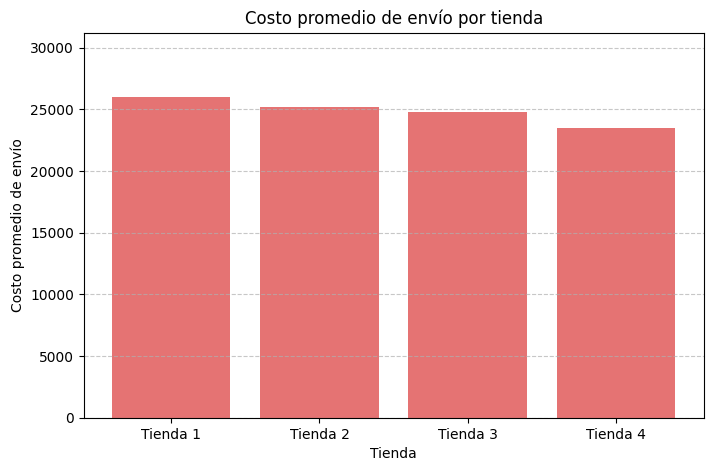

In [43]:
tiendas_envio = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
envios = [envio_promedio_tienda1, envio_promedio_tienda2, envio_promedio_tienda3, envio_promedio_tienda4]

plt.figure(figsize=(8, 5))
plt.bar(tiendas_envio, envios, color='#E57373')

plt.title('Costo promedio de envío por tienda')
plt.ylabel('Costo promedio de envío')
plt.xlabel('Tienda')
plt.ylim(0, max(envios) * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# ***CONCLUSIÓN***
En base a los datos revisados sobre el rendimiento de las cuatro tiendas del señor Juan, mi recomendación es que se considere vender la tienda número 4. Aunque esta tienda destaca por tener una mejor calificación en atención al cliente en comparación con la tienda n°1, presenta varias desventajas frente a las demás. En particular, en la venta de electrodomésticos y electrónicos cuyas categorias son las que más pesan en la facturación total, la tienda 4 se encuentra por debajo de sus competidoras. Por lo tanto, esta recomendación no se basa solo en las cifras, sino en el análisis general del desempeño de la tienda respecto al conjunto.